1. Visualiser plusieurs variantes de filtre et comprendre l'effet des paramètres.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from scipy import signal
import time

# lambd et theta : longueur d'onde et orientation de l'onde plane du filtre
# n : si n est non nul, il détermine la taille du filtre (n x n) (sélection manuelle de la taille)
# sl : facteur d'échelle de l'écart-type dans la direction de l'onde
# st : facteur d'échelle de l'écart-type dans la direction perpendiculaire
# nl : si n est nul, détermine la taille du filtre comme (2*int(nl*lambd)+1) (ajustement automatique de la taille)

In [3]:
def gabor_kernel(lambd = 16.0, theta = 0.0, n = 0, sl = 0.7, st = 1.4, nl = 4.0):
	if n <= 0: n = 1+2*int(nl*lambd)
	gl = -0.5/(sl*sl)
	gt = -0.5/(st*st)
	c = math.cos(theta)/lambd
	s = math.sin(theta)/lambd
	x0 = 0.5*(n-1)*(c+s)
	y0 = 0.5*(n-1)*(c-s)
	sc = 1.0/(2*math.pi*sl*st*lambd*lambd)
	gk = np.empty( (n,n), dtype='complex64' )
	for y in range (0,n):
		for x in range (0,n):
			xr = c*x+s*y-x0  # centering, rotation and scaling
			yr = c*y-s*x-y0  # centering, rotation and scaling
			a = 2.0*math.pi*xr  # wave phase
			gk[y,x] = sc*math.exp(gl*xr*xr+gt*yr*yr)*complex(math.cos(a),math.sin(a))
	return gk

In [4]:
def wave_kernel(lambd = 16.0, theta = 0.0, n = 0, sl = 0.7, st = 1.4, nl = 4.0):
	if n <= 0: n = 1+2*int(nl*lambd)
	gl = -0.5/(sl*sl)
	gt = -0.5/(st*st)
	c = math.cos(theta)/lambd
	s = math.sin(theta)/lambd
	x0 = 0.5*(n-1)*(c+s)
	y0 = 0.5*(n-1)*(c-s)
	sc = 1.0/(2*math.pi*sl*st*lambd*lambd)
	gk = np.empty( (n,n), dtype='complex64' )
	for y in range (0,n):
		for x in range (0,n):
			xr = c*x+s*y-x0  # centering, rotation and scaling
			yr = c*y-s*x-y0  # centering, rotation and scaling
			a = 2.0*math.pi*xr  # wave phase
			gk[y,x] = sc*complex(math.cos(a),math.sin(a))
	return gk

In [5]:
def gaussian_kernel(lambd = 16.0, theta = 0.0, n = 0, sl = 0.7, st = 1.4, nl = 4.0):
	if n <= 0: n = 1+2*int(nl*lambd)
	gl = -0.5/(sl*sl)
	gt = -0.5/(st*st)
	c = math.cos(theta)/lambd
	s = math.sin(theta)/lambd
	x0 = 0.5*(n-1)*(c+s)
	y0 = 0.5*(n-1)*(c-s)
	sc = 1.0/(2*math.pi*sl*st*lambd*lambd)
	gk = np.empty( (n,n), dtype='complex64' )
	for y in range (0,n):
		for x in range (0,n):
			xr = c*x+s*y-x0  # centering, rotation and scaling
			yr = c*y-s*x-y0  # centering, rotation and scaling
			a = 2.0*math.pi*xr  # wave phase
			gk[y,x] = sc*math.exp(gl*xr*xr+gt*yr*yr)
	return gk

In [6]:
def kernel_plot(k):
	kr = (k.view(np.float32).reshape(k.shape + (2,)))[:,:,0]  # extract real (cos) part
	ki = (k.view(np.float32).reshape(k.shape + (2,)))[:,:,1]  # extract imaginary (sin) part
	mpimg.imsave('kr.jpg',kr,cmap="gray")
	mpimg.imsave('ki.jpg',ki,cmap="gray")
	fig, (re, im) = plt.subplots(1, 2)  # real and imaginary parts
	re.imshow(kr, cmap='gray')
	re.set_title('Real part')
	re.set_axis_off()
	im.imshow(ki, cmap='gray')
	im.set_title('Imaginary part')
	im.set_axis_off()

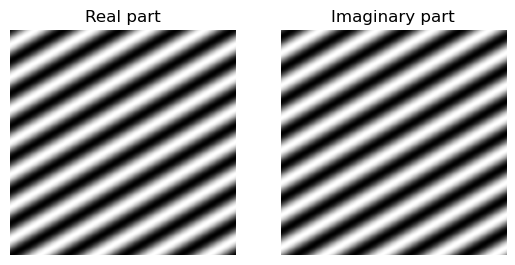

In [7]:
# Onde plane avec longueur d'onde de 24 pixels et orientation de pi/3 (60 degrés, l'origine est en haut à gauche) :
gk = wave_kernel(lambd=24, theta = math.pi/3)
kernel_plot(gk)

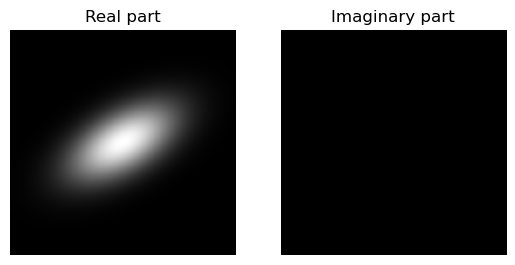

In [9]:
# Gaussienne elliptique (par défaut avec sl = 0.7 et st = 1.4)
gk = gaussian_kernel(lambd=24, theta = math.pi/3)
kernel_plot(gk)

(193, 193)

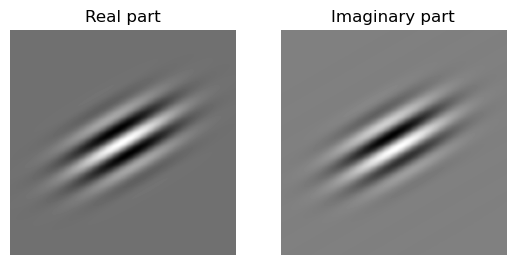

In [10]:
# Filtre de Gabor (produit des deux)
gk = gabor_kernel(lambd=24, theta = math.pi/3)
kernel_plot(gk)
gk.shape

(97, 97)

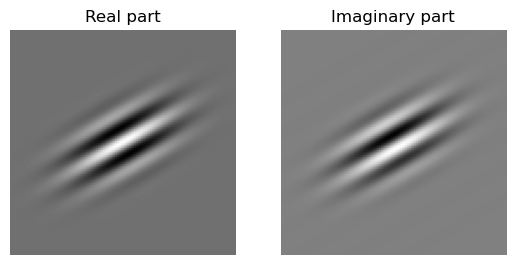

In [11]:
#Longueur d'onde de 12 pixels
gk = gabor_kernel(lambd=12, theta = math.pi/3)
kernel_plot(gk)
gk.shape

(256, 256)

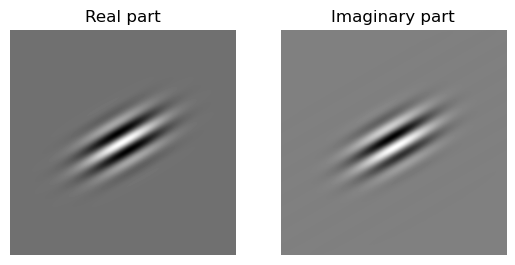

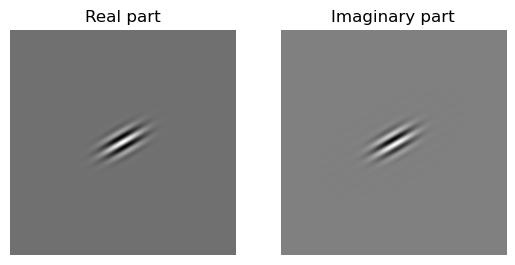

In [13]:
#Les mêmes avec une taille de fenêtre fixe et à la même échelle :
gk = gabor_kernel(lambd=24, theta = math.pi/3, n = 256)
kernel_plot(gk)
gk.shape

gk = gabor_kernel(lambd=12, theta = math.pi/3, n = 256)
kernel_plot(gk)
gk.shape

(193, 193)

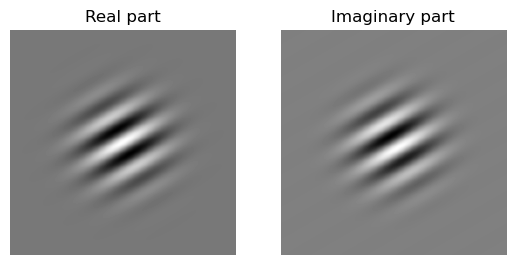

In [14]:
# Filtre circulaire : st = sl = 1
gk = gabor_kernel(lambd=24, theta = math.pi/3, sl = 1.0, st = 1.0)
kernel_plot(gk)
gk.shape

(121, 121)

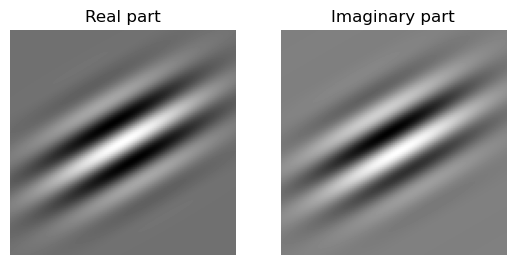

In [15]:
# Filtre avec “effet de bord” (dans le filtre) :
gk = gabor_kernel(lambd=24, theta = math.pi/3, nl = 2.5)
kernel_plot(gk)
gk.shape

2. Application d'un filtre à une image

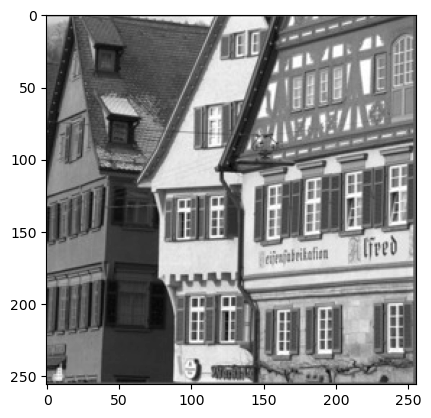

In [16]:
#Lecture d'une image :
img = mpimg.imread('houses.jpg')
plt.imshow(img, cmap="gray")

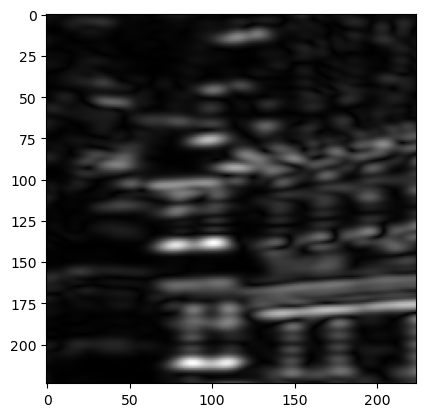

In [33]:
#Utilisation de la fonction convolve2d de scipy.signal et affichage du module de l'image transformée :
# Varier n -> Indique le nombre de pixels adjacents qui vont servir au filtre.

gk = gabor_kernel(lambd=4, theta = math.pi/2)
gab = signal.convolve2d(img, gk, boundary='symm', mode='valid')
plt.imshow(np.absolute(gab), cmap="gray")

3. Calcul de l'énergie moyenne à travers un filtre d'orientation et d'échelle donnés

In [35]:
# np.absolute() pour calculer le module d'un nombre complexe (élément par élément dans un tableau)
# np.square() pour calculer le carré d'un nombre (élément par élément dans un tableau)
# np.average() pour calculer la moyenne des valeurs dans un tableau

np.average(np.square(np.absolute(gab)))

11.775837

4. Calcul d'une transformée de Gabor

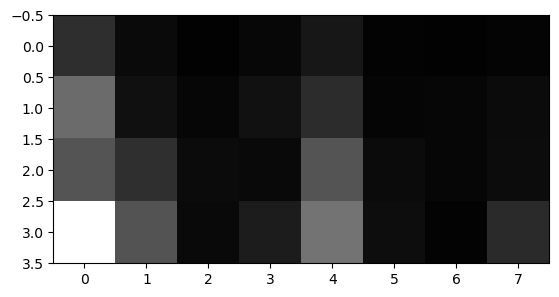

In [46]:
gt = np.zeros((4,8))
longueurs = [3, 6, 12, 24]

#Range 8 -> Représente une ligne
for i in range(8):
    for (index, lmbd) in enumerate(longueurs): #enumerate renvoie un tuple <Index, Valeur>
        gk = gabor_kernel(lambd=lmbd, theta = math.pi * i/8)
        gab = signal.convolve2d(img, gk, boundary='symm', mode='valid')
        gt[index][i] = np.average(np.square(np.absolute(gab)))

plt.imshow(gt,cmap='gray',vmin=0,vmax=np.amax(gt))

5. Réhaussement (relatif) des courtes longeurs d'onde

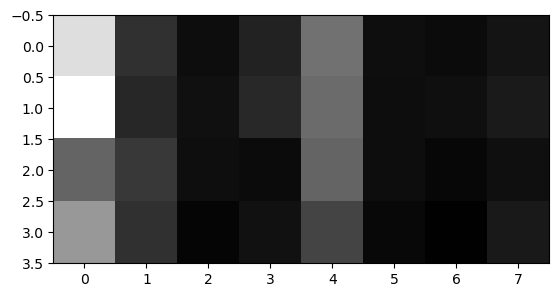

In [47]:
gt = np.zeros((4,8))
longueurs = [3, 6, 12, 24]

#Range 8 -> Représente une ligne
for i in range(8):
    for (index, lmbd) in enumerate(longueurs): #enumerate renvoie un tuple <Index, Valeur>
        gk = gabor_kernel(lambd=lmbd, theta = math.pi * i/8)
        gab = signal.convolve2d(img, gk, boundary='symm', mode='valid')
        gt[index][i] = np.average(np.square(np.absolute(gab))) / pow(2, index)

# Le réhaussement permet de détailler la sortie et d'étudier plus facilement le résultat obtenu
# de base une image ne contient pas énormément d'énergie en fonction des zones, le réhaussement met en avant cette énergie
plt.imshow(gt,cmap='gray',vmin=0,vmax=np.amax(gt))

6. Calcul des transformées avec réhaussement pour les quatre image test et calcul de similarités par distance euclidienne.

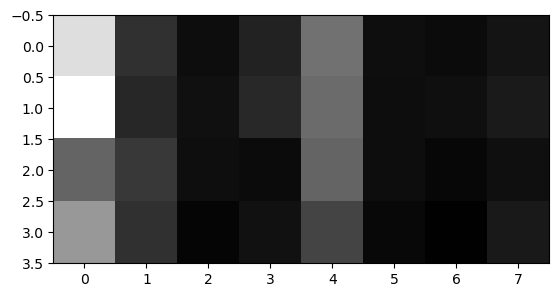

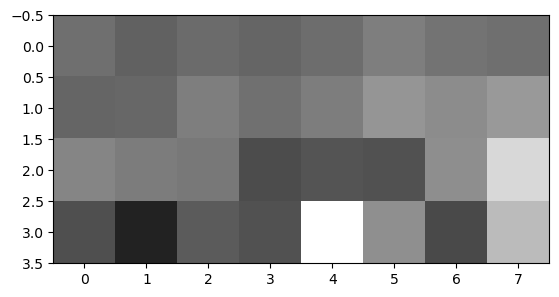

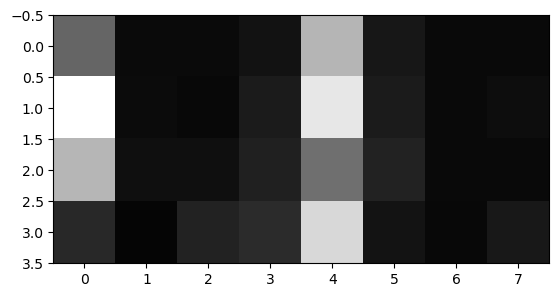

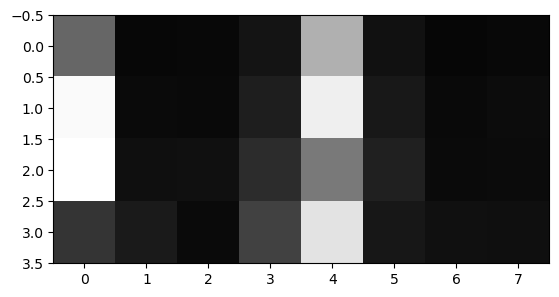

In [49]:
def Gabor(imgName = "", lamb = 2, theta = math.pi * 1/8):
    img = mpimg.imread(imgName)
    gk = gabor_kernel(lambd=lamb, theta = theta)
    gab = signal.convolve2d(img, gk, boundary='symm', mode='valid')
    return gab

for image in ['houses.jpg', 'cat.jpg', 'bur0.jpg', 'bur1.jpg']:
    gt = np.zeros((4,8))
    longueurs = [3, 6, 12, 24]

    #Range 8 -> Représente une ligne
    for i in range(8):
        for (index, lmbd) in enumerate(longueurs): #enumerate renvoie un tuple <Index, Valeur>
            gab = Gabor(image, lmbd, math.pi * i/8)
            gt[index][i] = np.average(np.square(np.absolute(gab))) / pow(2, index)

    plt.imshow(gt,cmap='gray',vmin=0,vmax=np.amax(gt))
    plt.show()

7. Accélérer le calcul.

In [ ]:
from PIL import Image
imgp = Image.fromarray(img)
imgp = imgp.resize((img.shape[0]//2, img.shape[1]//2), resample=Image.BILINEAR)